# Predict whether income exceeds $50K/yr

use the dataset in [this](https://archive.ics.uci.edu/ml/datasets/Adult) link to predict whether income exceeds $50k/yr

In [9]:
import pandas as pd
import numpy as np

In [77]:
dataset = pd.read_csv('../dataset/adult2.csv')
dataset.columns = ['age','workclass','fnlwgt','education','education_nom','mariral_status','occupation'
                   ,'relaionship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','y']
dataset

,age,workclass,fnlwgt,education,education_nom,mariral_status,occupation,relaionship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
dataset['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_nom   32560 non-null  int64 
 5   mariral_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relaionship     32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  y               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
dataset.drop(['education_nom'],axis=1,inplace=True)

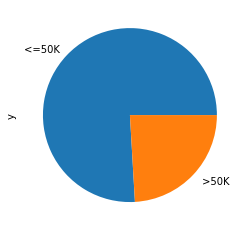

In [12]:
dataset['y'].value_counts().plot(kind='pie')

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  int64 
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   mariral_status  32560 non-null  int64 
 5   occupation      32560 non-null  int64 
 6   relaionship     32560 non-null  int64 
 7   race            32560 non-null  int64 
 8   sex             32560 non-null  int64 
 9   capital_gain    32560 non-null  int64 
 10  capital_loss    32560 non-null  int64 
 11  hours_per_week  32560 non-null  int64 
 12  native_country  32560 non-null  int64 
 13  y               32560 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [69]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
dataset['workclass'] = le1.fit_transform(dataset['workclass'])
le2 = LabelEncoder()
dataset['education'] = le2.fit_transform(dataset['education'])
le3 = LabelEncoder()
dataset['mariral_status'] = le3.fit_transform(dataset['mariral_status'])
le4 = LabelEncoder()
dataset['occupation'] = le4.fit_transform(dataset['occupation'])
le5 = LabelEncoder()
dataset['relaionship'] = le5.fit_transform(dataset['relaionship'])
le6 = LabelEncoder()
dataset['race'] = le6.fit_transform(dataset['race'])
le7 = LabelEncoder()
dataset['sex'] = le7.fit_transform(dataset['sex'])
le8 = LabelEncoder()
dataset['native_country'] = le8.fit_transform(dataset['native_country'])

le9 = LabelEncoder()
dataset['y'] = le9.fit_transform(dataset['y'])

In [74]:
int(le2.transform([ ' Doctorate']))

10

In [63]:
dataset

,age,workclass,fnlwgt,education,education_nom,mariral_status,occupation,relaionship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,y
0,50,6,83311,Bachelors,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,HS-grad,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,11th,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,Bachelors,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,Masters,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,Assoc-acdm,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,HS-grad,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,HS-grad,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,HS-grad,9,4,1,3,4,1,0,0,20,39,0


In [16]:
# from sklearn.preprocessing import OneHotEncoder
# one = OneHotEncoder()
# X = one.fit_transform(X)
# X

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   workclass       32560 non-null  int64
 2   fnlwgt          32560 non-null  int64
 3   education_nom   32560 non-null  int64
 4   mariral_status  32560 non-null  int64
 5   occupation      32560 non-null  int64
 6   relaionship     32560 non-null  int64
 7   race            32560 non-null  int64
 8   sex             32560 non-null  int64
 9   capital_gain    32560 non-null  int64
 10  capital_loss    32560 non-null  int64
 11  hours_per_week  32560 non-null  int64
 12  native_country  32560 non-null  int64
 13  y               32560 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [18]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values
pd.Series(y).value_counts()

0    24719
1     7841
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[1.97809007, 2.74702102, 3.1397542 , ..., 0.        , 3.24302388,
        5.01768032],
       [3.73639235, 2.74702102, 0.32646352, ..., 0.        , 1.62151194,
        5.01768032],
       [3.44334197, 4.12053153, 2.31473573, ..., 0.        , 3.24302388,
        4.50304644],
       ...,
       [2.27114045, 2.74702102, 1.07877092, ..., 0.        , 3.24302388,
        5.01768032],
       [1.97809007, 2.74702102, 0.35391188, ..., 4.11750432, 3.24302388,
        5.01768032],
       [1.90482747, 2.74702102, 2.34698209, ..., 0.        , 5.2699138 ,
        5.01768032]])

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',max_iter=100)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7837837837837838

In [23]:
cm = confusion_matrix(y_test, lr.predict(X_test))
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5010
           1       0.56      0.30      0.39      1502

    accuracy                           0.78      6512
   macro avg       0.69      0.62      0.63      6512
weighted avg       0.76      0.78      0.76      6512



,0,1
0,4649,361
1,1047,455


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [198]:
clf = SGDClassifier()
accur = cross_val_score(clf,X=X_train,y=y_train,cv=3)
accur.mean()

0.7893136187113704

In [30]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, knn.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5010
           1       0.66      0.59      0.62      1502

    accuracy                           0.84      6512
   macro avg       0.77      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512



,0,1
0,4556,454
1,616,886


In [200]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada= AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
print(classification_report(y_test,ada.predict(X_test)),'\n------------------------')

gbc= GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train,y_train)
print(classification_report(y_test,gbc.predict(X_test)))

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(classification_report(y_test,xgb.predict(X_test)))
cm = confusion_matrix(y_test, xgb.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4912
           1       0.79      0.60      0.69      1600

    accuracy                           0.86      6512
   macro avg       0.84      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512
 
------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      4912
           1       0.81      0.59      0.68      1600

    accuracy                           0.87      6512
   macro avg       0.85      0.77      0.80      6512
weighted avg       0.86      0.87      0.86      6512

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4912
           1       0.79      0.66      0.72      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.80      0.82      6512
weighted avg       0.87      0.87      0.87     

,0,1
0,4627,285
1,549,1051


In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(classification_report(y_test,xgb.predict(X_test)))
cm = confusion_matrix(y_test, xgb.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5010
           1       0.76      0.68      0.72      1502

    accuracy                           0.88      6512
   macro avg       0.83      0.81      0.82      6512
weighted avg       0.87      0.88      0.87      6512



,0,1
0,4691,319
1,483,1019


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(classification_report(y_test,rf.predict(X_test)))
cm = confusion_matrix(y_test, rf.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5010
           1       0.73      0.63      0.67      1502

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.86      0.86      6512



,0,1
0,4652,358
1,558,944


In [203]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [204]:
print(classification_report(y_test,svc.predict(X_test)))
cm = confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4912
           1       0.78      0.51      0.62      1600

    accuracy                           0.84      6512
   macro avg       0.82      0.73      0.76      6512
weighted avg       0.84      0.84      0.83      6512



,0,1
0,4678,234
1,785,815


# It is clear that I want to increase minority class because f1-score in all used clasifiers is low so let's go 

In [33]:
import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE   #'Synthetic Minority Oversampling TEchnique'

oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)
X

0.6.2


array([[    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       [    53,      4, 234721, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [34]:
pd.Series(y2).value_counts()

1    24719
0    24719
dtype: int64

In [44]:
# from sklearn.preprocessing import OneHotEncoder
# one = OneHotEncoder()
# X2 = one.fit_transform(X2)

In [35]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [37]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train2,y_train2)

y_pred = knn.predict(X_test2)
print(classification_report(y_test2,y_pred))

cm = confusion_matrix(y_test2, knn.predict(X_test2))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      5009
           1       0.69      0.77      0.73      4879

    accuracy                           0.72      9888
   macro avg       0.72      0.72      0.72      9888
weighted avg       0.72      0.72      0.72      9888



,0,1
0,3362,1647
1,1137,3742


In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train2,y_train2)
print(classification_report(y_test2,xgb.predict(X_test2)))
cm = confusion_matrix(y_test2, xgb.predict(X_test2))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5009
           1       0.88      0.90      0.89      4879

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



,0,1
0,4402,607
1,512,4367


In [40]:
from sklearn.model_selection import cross_val_score
accur = cross_val_score(estimator=xgb, X=X_test2,y=y_test2)

In [42]:
accur

array([0.87259858, 0.86653185, 0.86552073, 0.86697016, 0.87809813])

In [43]:
train_accur = cross_val_score(estimator=xgb, X=X_test,y=y_test)

In [44]:
train_accur

array([0.86722947, 0.8457406 , 0.859447  , 0.86482335, 0.85176651])

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train2,y_train2)
print(classification_report(y_test2,rf.predict(X_test2)))
cm = confusion_matrix(y_test2, rf.predict(X_test2))
pd.DataFrame(cm)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5009
           1       0.87      0.89      0.88      4879

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888



,0,1
0,4369,640
1,515,4364


## It's obvoius that f1-score increased due to oversampling of minprity class .
## the best classifier is XGBoost 

In [75]:
def test(test_input):
    '''input this information in this order in a list to get prediction about your income
    ['age','workclass','fnlwgt','education','mariral_status','occupation'
    ,'relaionship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous,The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc),
India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,
Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
output : >50K or <=50K.   
    '''
    test_input[1] = int(le1.transform([test_input[1]]))
    test_input[3] = int(le2.transform([test_input[3]]))
    test_input[4] = int(le3.transform([test_input[4]]))
    test_input[5] = int(le4.transform([test_input[5]]))
    test_input[6] = int(le5.transform([test_input[6]]))
    test_input[7] = int(le6.transform([test_input[7]]))
    test_input[8] = int(le7.transform([test_input[8]]))
    test_input[-1] = int(le8.transform([test_input[-1]]))
    test_input = np.array(test_input).reshape(1,-1)
    return xgb.predict(test_input)

In [85]:
test([50,' Private',0,' Bachelors',' Married-civ-spouse',' Tech-support',' Wife',' White',' Female',10,
      10,52,' Yugoslavia'])

array([1])